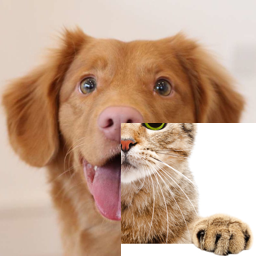

In [20]:
# CUT MIX 를 구현하시오
from PIL import Image
import numpy as np


def rand_bbox(img, lam):
    """
    랜덤한 사이즈로 crop 하는 함수 
    size: 이미지 크기
    lam: 이미지 중 몇 퍼센트를 자를지 정하는 함수
    output: crop할 네 좌표 bbx1, bby1, bbx2, bby2
    """
    W = img[0]
    H = img[1]
    cut_rat = np.sqrt(1. - lam)
    #자를 이미지의 W, H 선택 (int) 
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # Uniform 하게 자를 x,y 좌표를 선택
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    # numpy clip 을 통해서 각 좌표의 크기가 이미지 크기를 벗어나지 못하게 하기 , cut size의 //2를 빼고 더할 것
    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cx + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2


def cut_generator(img1, img2, lam = 0.3):
    """
    Cut mix 이미지 만드는 함수, img1에 img2를 갖다 붙일 것임
    output: 갖다 붙인 img1
    """
    bbx1, bby1, bbx2, bby2 = rand_bbox(img2.shape, lam)
    img1[bbx1:bbx2, bby1:bby2] = img2[bbx1:bbx2, bby1:bby2]
    
    return img1

# Test용 코드 
# 이미지 확장자가 안 맞으면 jpeg로 바꿔보세요
dir1 = '/content/drive/MyDrive/22. 20220118_DAY21/dog.jpg'
dir2 = '/content/drive/MyDrive/22. 20220118_DAY21/cat.jpg' 
img1 = np.array(Image.open(dir1).convert('RGB').resize((256,256)))
img2 = np.array(Image.open(dir2).convert('RGB').resize((256,256)))

img = cut_generator(img1,img2)
Image.fromarray(img)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
